In [1]:
from dataclasses import dataclass 
from restr_rating.logger import logging
from restr_rating.exception import RatingException 
from restr_rating.entity import config_entity, artifact_entity
from typing import Optional 
import pandas as pd 
import numpy as np 
import os, sys 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import LabelEncoder 
from restr_rating import utils
from restr_rating.config import TARGET_COLUMN, ENCODE_EXCLUDE_COLUMN

class DataTransformation:
    
    def __init__(self, data_transformation_config:config_entity.DataTransformationConfig,
                        data_ingestion_artifact:artifact_entity.DataIngestionArtifact):
        
        try:
            logging.info(f"{'>'*30} Initiated Data Transformation {'<'*30}")
            self.data_transformation_config = data_transformation_config
            self.data_ingestion_artifact = data_ingestion_artifact
        except Exception as e:
            raise RatingException(e, sys)

    

In [2]:
def Encode(df):
    # Initialize the LabelEncoder object
        le = LabelEncoder()
        
        # Iterate through columns in the DataFrame
        for column in df.columns[~df.columns.isin(ENCODE_EXCLUDE_COLUMN)]:
            # Fit and transform the categorical column using LabelEncoder
            df[column] = le.fit_transform(df[column])
        # Return the encoded DataFrame
        return df

In [3]:
train_file = pd.read_csv("/config/workspace/artifact/02_16_2023__08_26_48/data_ingestion/dataset/train.csv")
test_file = pd.read_csv("/config/workspace/artifact/02_16_2023__08_26_48/data_ingestion/dataset/test.csv")

In [4]:
transformed_train_file = Encode(train_file)
transformed_test_file = Encode(test_file)

In [5]:
transformed_train_file

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,6875,6105,1,0,3.6,23,18,24,1648,800,12157,6886,2,17
1,7725,6191,1,0,3.2,8,88,56,1075,400,6154,1576,4,29
2,4753,4869,1,1,3.8,360,35,71,977,1300,3763,2806,2,15
3,2157,670,0,0,3.1,7,3,73,1232,250,4230,6886,2,12
4,3092,4333,1,1,4.3,686,27,24,1460,1000,13511,6886,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32984,7478,4524,1,0,4.0,121,9,73,1996,900,10694,6886,4,6
32985,1720,6175,1,0,2.9,24,19,24,1552,600,130,6886,4,8
32986,762,1724,0,1,4.3,2741,8,7,963,1300,2759,6886,2,27
32987,1374,1213,1,1,4.0,199,29,73,1989,700,13659,3100,2,2


In [5]:
from restr_rating.entity.config_entity import DataTransformationConfig
from restr_rating.entity.config_entity import TrainingPipelineConfig

In [6]:
training_pipeline_config = TrainingPipelineConfig()
data_transformation_config = DataTransformationConfig(training_pipeline_config)

In [12]:
data_transformation_config.transformed_train_path

'/config/workspace/artifact/02_16_2023__08_38_44/data_transformation/transformed/train.npz'

In [19]:
# def save_numpy_array_data(file_path:str, df:pd.DataFrame):
#     """
#     Save Pandas DataFrame data as a NumPy array to file
#     file_path: str location of file to save
#     df: pd.DataFrame data to save
#     """
#     try:
#         dir_path = os.path.dirname(file_path)
#         os.makedirs(dir_path, exist_ok=True)
#         array = df.to_numpy()  # Convert DataFrame to NumPy array
#         with open(file_path, "wb") as file_obj:
#             np.save(file_obj, array)
#     except Exception as e:
#         raise RatingException(e, sys)

In [7]:
utils.save_numpy_array_data(df=transformed_train_file, file_path=data_transformation_config.transformed_train_path)

In [20]:
save_numpy_array_datasave_numpy_array_data

In [18]:
utils.save_numpy_array_data(file_path=data_transformation_config.transformed_train_path, df=transformed_train_file)
utils.save_numpy_array_data(file_path=data_transformation_config.transformed_test_path, df=transformed_test_file)

RatingException: Error Occured python script name /config/workspace/restr_rating/utils.py line number 74 error message name 'dataframe' is not defined

In [ ]:
def initiate_data_transformation(self)->artifact_entity.DataTransformationArtifact:
        try: 
            # reading the training and testing files
            logging.info("Reading train and test files in data_transformation.py")
            train_df = pd.read_csv(self.data_ingestion_artifact.train_file_path)
            test_df = pd.read_csv(self.data_ingestion_artifact.test_file_path)

            # transforming training and testing dataset
            logging.info(f"Transforming train and test dataframes")
            transformed_train_path = self.Encode(train_df)
            transformed_test_path = self.Encode(test_df)


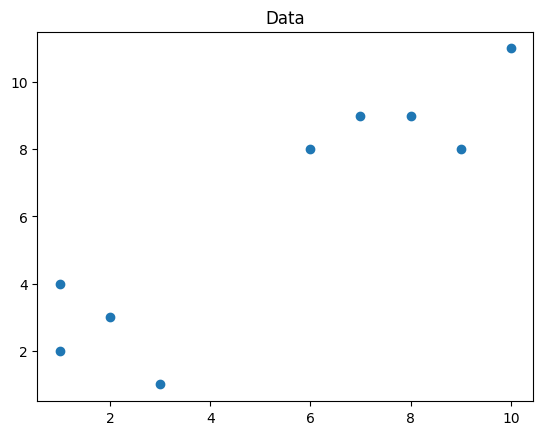

/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/clust

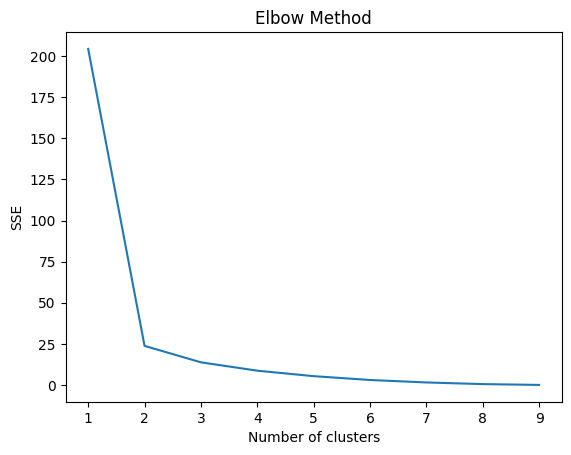

In [9]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate some random data
X = np.array([[3, 1], [1, 2], [1, 4], [2, 3], [6, 8], 
                [7, 9], [9, 8], [8, 9], [10,11]])

# Plot the data
plt.scatter(X[:,0], X[:,1])
plt.title("Data")
plt.show()

# Calculate SSE for different values of k
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot SSE vs k
plt.plot(k_range,sse)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

In [11]:
import os
import psutil

# Get process id of current Python instance
pid = os.getpid()

# Get process object of current Python instance
python_process = psutil.Process(pid)

# Get memory info of current Python instance
memoryUse = python_process.memory_info()

# Print memory info in bytes
print("Memory info:", memoryUse)

# Print memory info in GB by accessing the fields of the named tuple
print("Memory use (GB):")
print("rss:", memoryUse.rss / 2.**30)
print("vms:", memoryUse.vms / 2.**30)
print("shared:", memoryUse.shared / 2.**30)
print("text:", memoryUse.text / 2.**30)
print("lib:", memoryUse.lib / 2.**30)
print("data:", memoryUse.data / 2.**30)
print("dirty:", memoryUse.dirty / 2.**30)

Memory info: pmem(rss=657444864, vms=7492333568, shared=35373056, text=2719744, lib=0, data=6606303232, dirty=0)
Memory use (GB):
rss: 0.6122932434082031
vms: 6.977779388427734
shared: 0.0329437255859375
text: 0.002532958984375
lib: 0.0
data: 6.152599334716797
dirty: 0.0
